In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set(font_scale=2)


In [2]:
train_df = pd.read_csv('data/train.csv')
test_df  = pd.read_csv('data/nlp_test.csv')


# 观察训练和测试数据的前几行

In [3]:
train_df.head(5)

,ID,category_A,category_B,category_C,category_D,category_E,category_F,Question Sentence
0,QC0000000001,0,1,0,0,0,0,病情描述：病人是典型的“三高”，想吃拜阿司匹林做为预防用药，但是出现过敏症状。曾经治疗情况和...
1,QC0000000002,0,1,0,0,0,0,"病情描述：我父亲78岁,小脑梗塞，表现左眼双视，经住院输液治疗现在恢复一月余，现在看人不重影..."
2,QC0000000003,0,1,0,0,0,0,病情描述：医生您好！我想问一下，我妈脑梗塞今天住院十一天了，情况好转，可以下床活动和清楚表达...
3,QC0000000004,1,0,0,0,0,0,停药反跳的血压是身体真实状况吗?
4,QC0000000005,0,1,0,0,0,0,病情描述：医生：银杏叶片生产厂很多，价格差别很大，应怎样选择？曾经治疗情况和效果：头部紧束感...


In [4]:
test_df.head(5)

,ID,Question Sentence
0,QCT1000000001,乙肝抗体多久打一次乙肝抗体多久打一次，戊型肝炎的传播途径是怎样的，伴侣中有一个是乙肝携带，不...
1,QCT1000000002,十日观察法我没被狗咬伤，我想问问，狂犬病不是有十日观察法吗，那如果说狗咬人时狗得了狂犬病，可...
2,QCT1000000003,我的乙肝大三阳十年了，现在能治的好了吗沈阳肝病携带者能治好，我的乙肝大三阳十年了，现在能治的...
3,QCT1000000004,治疗丙肝哪里治疗最好丙肝的预防与治疗，治疗丙肝哪里治疗最好，丙肝表现症状是什么呢？丙肝有哪些...
4,QCT1000000005,婚检乙肝上千倍婚检乙肝上千倍，我父亲肝硬化失代偿期，有单个结节癌变。有乙肝病史已经射频手术，...


## 我们能看到数据的字段包含微博id，微博发布时间，微博中文内容，微博图片，微博视频 和情感倾向(标签)

In [5]:
train_df.shape, test_df.shape

((5000, 8), (3000, 2))

In [6]:
df=pd.concat([train_df,test_df],sort=False)

## 多标签

Text(0.5, 1.0, 'category_A')

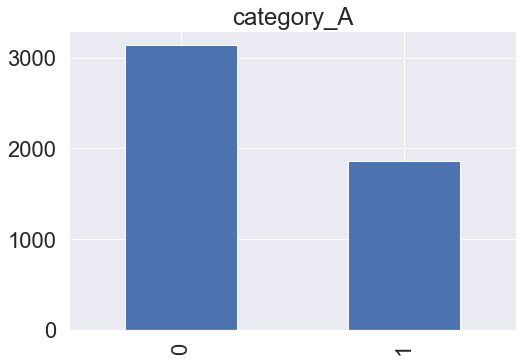

In [7]:
train_df['category_A'].value_counts().plot.bar()
plt.title('category_A')

Text(0.5, 1.0, 'category_B')

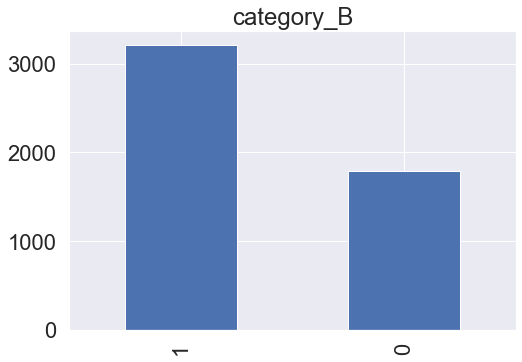

In [8]:
train_df['category_B'].value_counts().plot.bar()
plt.title('category_B')

Text(0.5, 1.0, 'category_C')

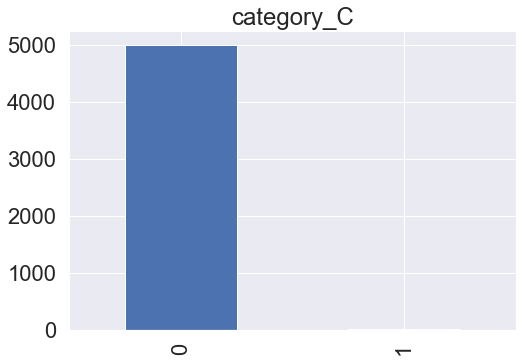

In [9]:
train_df['category_C'].value_counts().plot.bar()
plt.title('category_C')

Text(0.5, 1.0, 'category_D')

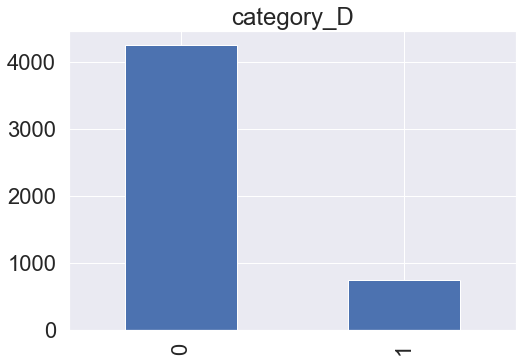

In [10]:
train_df['category_D'].value_counts().plot.bar()
plt.title('category_D')

Text(0.5, 1.0, 'category_E')

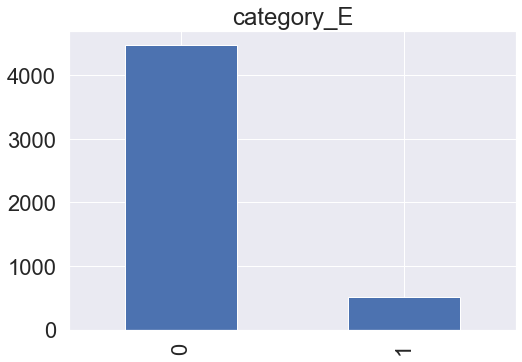

In [11]:
train_df['category_E'].value_counts().plot.bar()
plt.title('category_E')

Text(0.5, 1.0, 'category_F')

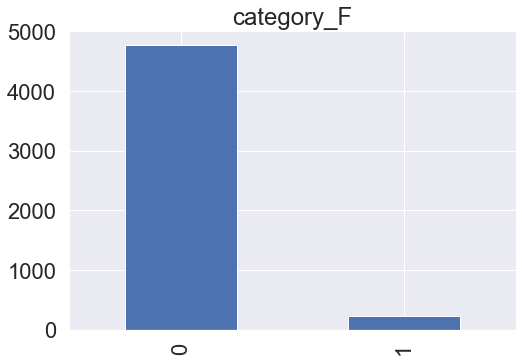

In [12]:
train_df['category_F'].value_counts().plot.bar()
plt.title('category_F')

# 数据清洗

from bs4 import BeautifulSoup
def beautifulSoup(html):
    soup = BeautifulSoup(html,'html.parser')
    return soup.get_text()

df['Question Sentence'] = df['Question Sentence'].apply(beautifulSoup) # applymap()则作用于DataFrame中的每一个元素

In [13]:
import re
def htmlClean(text):
    re_tag = re.compile('im=new Image;im.src.*";')  # HTML标签
    new_text = re.sub(re_tag, '', text)
    return new_text
 
        

df['Question Sentence'] = df['Question Sentence'].apply(htmlClean) # applymap()则作用于DataFrame中的每一个元素

# 替换中英文字符
import re
def replace_punctuation(example):
    example = list(example)
    pre = ''
    cur = ''
    for i in range(len(example)):
        if i == 0:
            pre = example[i]
            continue
        pre = example[i-1]
        cur = example[i]
        if re.match("[\w]", pre): # pre是中文、数字、字母
            if re.match("[\w]", cur): # cur是中文、数字、字母
                continue
            elif cur == ',':
                example[i] = '，'
            elif cur == '.':
                example[i] = '。'
            elif cur == '?':
                example[i] = '？'
            elif cur == ':':
                example[i] = '：'
            elif cur == ';':
                example[i] = '；'
            elif cur == '!':
                example[i] = '！'
            elif cur == '"':
                example[i] = '”'
            elif cur == "'":
                example[i] = "’"
        else: # pre非中文、数字、字母
            if not re.match("[\w]", cur): # cur非中文、数字、字母
                example[i] = ''
    return ''.join(example)

df['Question Sentence'] = df['Question Sentence'].apply(replace_punctuation) # applymap()则作用于DataFrame中的每一个元素

r1 = "[a-zA-Z'!\"#$%&'()*+,-./:;<=>?@★[\\]^_`{|}~]+"
comment = []
for com_str in df['Question Sentence']:
    com_str = re.sub(r1,'',com_str) # 非法字符替换为空
    com_str = com_str.replace("病情描述：","")
    com_str = com_str.strip()
    if not com_str:
        com_str = '无'
    comment.append(com_str)
    
df['Question Sentence'] = comment


In [17]:
df['Question Sentence_len'] = df['Question Sentence'].astype(str).apply(len)

In [18]:
train_df = df[:len(train_df)]
test_df = df[len(train_df):]



<AxesSubplot:xlabel='Question Sentence_len', ylabel='Density'>

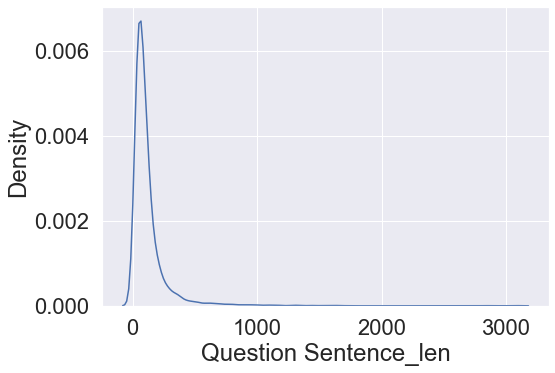

In [19]:
sns.kdeplot(df['Question Sentence_len'])
#plt.title('weibo_len')

<AxesSubplot:xlabel='Question Sentence_len', ylabel='Density'>

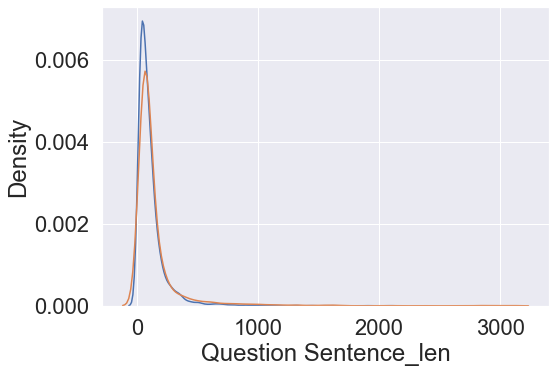

In [20]:
sns.kdeplot(train_df['Question Sentence_len'])
sns.kdeplot(test_df['Question Sentence_len'])

<AxesSubplot:xlabel='Question Sentence_len', ylabel='Density'>

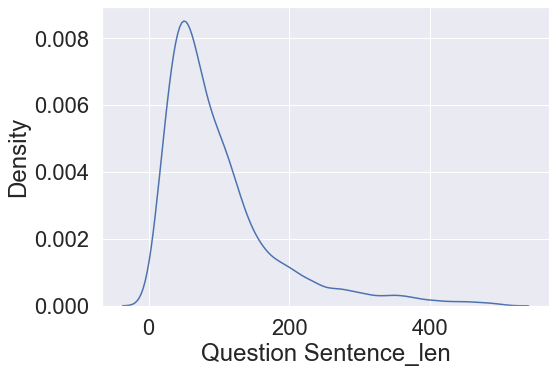

In [36]:
x = df.loc[df["Question Sentence_len"]<500]
sns.kdeplot(x['Question Sentence_len'])

In [37]:
test_df.head(5)

,ID,category_A,category_B,category_C,category_D,category_E,category_F,Question Sentence
0,QCT1000000001,NaN,NaN,NaN,NaN,NaN,NaN,乙肝抗体多久打一次乙肝抗体多久打一次，戊型肝炎的传播途径是怎样的，伴侣中有一个是乙肝携带，不...
1,QCT1000000002,NaN,NaN,NaN,NaN,NaN,NaN,十日观察法我没被狗咬伤，我想问问，狂犬病不是有十日观察法吗，那如果说狗咬人时狗得了狂犬病，可...
2,QCT1000000003,NaN,NaN,NaN,NaN,NaN,NaN,我的乙肝大三阳十年了，现在能治的好了吗沈阳肝病携带者能治好，我的乙肝大三阳十年了，现在能治的...
3,QCT1000000004,NaN,NaN,NaN,NaN,NaN,NaN,治疗丙肝哪里治疗最好丙肝的预防与治疗，治疗丙肝哪里治疗最好，丙肝表现症状是什么呢？丙肝有哪些...
4,QCT1000000005,NaN,NaN,NaN,NaN,NaN,NaN,婚检乙肝上千倍婚检乙肝上千倍，我父亲肝硬化失代偿期，有单个结节癌变。有乙肝病史已经射频手术，...


In [38]:
train_df.to_csv("train_clean.csv",index=False)
test_df.to_csv("test_clean.csv",index=False)